<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/checkpointLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective\
Regression \
This is a [dataset](https://drive.google.com/file/d/1Yf8pIkoJ0XG-Wz9T46wYRVobRhbOUtq8/view?usp=sharing) containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown

# Preprocessing and Data Visualization
1. Explore this dataset using what you have learned in data preprocessing and data visualization

Importer les librairies necessaires pour le prétraitement et l'analyse des donnée

pré-traitement :
* pandas
* numpy 

analyse de donnée :
* matplotlib.pyplot 
* seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DataFrame
Importer les données et visualiser l'entête du jeu de données 

In [ ]:
from google.colab import drive # import google colab 
drive.mount('/content/drive') # importer google drive 

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Gomycode /Introduction a IA /Cour 5/checkpoint/kc_house_data.csv"
dataframe = pd.read_csv(path)

dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataframe.shape

(21613, 21)

In [ ]:
dataframe.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Informations sur les colones
Le dataset contients **21613** **Maisons** selon **21 critères** que ont :

**id** :Identifiant de la maison

**date**: Date de vente de la maison

**price**: Prix de vente de la maison 

**bedrooms**: Nombre de chambres à coucher/maison

**bathrooms**: Nombre de salles de bains/chambres 

**sqft_living**: la superficie de la maison en **sq.ft** (square footage of the home)

**sqft_lot**: la superficie du lot en **ft** (square footage of the lot)

**floors** :Nombre total d'étages (niveaux) dans la maison

**waterfront** :maison avec vue sur mer 

**view**: maison qui a été consulté

**condition**: La qualité de l'état général de la maison

**grade**: note globale attribuée à l'unité de logement, sur la base du système de notation du comté de King

**sqft_above** :superficie de la maison sans le sous-sol en **sq.ft**

**sqft_basement**: superficie du sous-sol en **sq.ft**

**yr_built** :Année de construction

**yr_renovated** : Année de renovation de la maison

**zipcode**: code postal utilisé aux us 

**lat**:  Coordonnée sur la latitude  en dégrée

**long**: Coordonnée sur la longitude en degrée

**sqft_living15** :Surface du salon en 2015 (impliquant des rénovations) Cela a pu ou non affecter la taille du terrain.

**sqft_lot15** :superficie du terrain en 2015(implique quelques rénovations)

In [ ]:
def init_TabInfoColones():
    InfoColone = pd.DataFrame()
    index_InfoColone = ['Unicité', 'Dtype', 'NaN', 'Nombre Valeurs Uniques', 'Pourcentage', 'Minimum', 'Maximum', 'Moyenne', 'Top', 'Freq']
    InfoColone.index = index_InfoColone
    return InfoColone

def InfoSurColones(dataframe):
    print("Information Général sur le dataframe ... \n")
    print(f"Liste de colones:\n {dataframe.columns}")
    print(f"le dataframe contient {dataframe.shape[0]} ligne(s) et {dataframe.shape[1]} colone(s) \n")
    df = init_TabInfoColones()
    valeurs = list()
    for colone in list(dataframe.columns):
        #Unicité
        valeur_unique = "Pas unique"
        if(dataframe[colone].is_unique):
            valeur_unique = 'Unique'
        valeurs.append(valeur_unique)
        #Dtype
        valeurs.append((dataframe[colone]).dtype)
        #NaN
        valeurs.append(dataframe[colone].isnull().sum())
        #Nombre Valeurs Uniques
        valeurs.append(len(dataframe[colone].value_counts()))
        #Pourcentage
        valeurs.append(round(len(dataframe[colone].value_counts())/dataframe.shape[0]*100, 2))
        if((dataframe[colone]).dtype != pd.DataFrame(['null']).dtypes):
            #Minimum
            valeurs.append(dataframe[colone].describe().get('min'))
            #Maximum
            valeurs.append(dataframe[colone].describe().get('max'))
            #Moyenne
            valeurs.append(dataframe[colone].describe().get('mean'))
            #Top
            valeurs.append(dataframe[colone].describe().get('existe pas'))
            #Freq
            valeurs.append(dataframe[colone].describe().get('existe pas'))
        else:
            #Minimum
            valeurs.append('existe pas')
            #Maximum
            valeurs.append(dataframe[colone].describe().get('existe pas'))
            #Moyenne
            valeurs.append(dataframe[colone].describe().get('existe pas'))
            #Top
            valeurs.append(dataframe[colone].describe().get('top'))
            #Freq
            valeurs.append(dataframe[colone].describe().get('freq'))
        
        df[colone] = valeurs
        valeurs.clear()
    return df

In [ ]:
infoColones = InfoSurColones(dataframe)
infoColones

Information Général sur le dataframe ... 

Liste de colones:
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
le dataframe contient 21613 ligne(s) et 21 colone(s) 



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unicité,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,...,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique,Pas unique
Dtype,int64,object,float64,int64,float64,int64,int64,float64,int64,int64,...,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nombre Valeurs Uniques,21436,372,4028,13,30,1038,9782,6,2,5,...,12,946,306,116,70,70,5034,752,777,8689
Pourcentage,99.18,1.72,18.64,0.06,0.14,4.8,45.26,0.03,0.01,0.02,...,0.06,4.38,1.42,0.54,0.32,0.32,23.29,3.48,3.6,40.2
Minimum,1000102.0,existe pas,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,...,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
Maximum,9900000190.0,None,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,...,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0
Moyenne,4580301520.864988,None,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
Top,None,20140623T000000,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Freq,None,142,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
dictionnaire_donnees = {
    "id":"Identifiant  de la maison",
    "date":"Date de vente",
    "price":"Prix de vente",
    "bedrooms":"Nombre de chambres",
    "bathrooms":"Nombre de salles de bains",
    "sqft_living":"superficie de la maison en sq.ft",
    "sqft_lot":"superficie du terrain en ft",
    "floors":"Nombre total d'étages",
    "waterfront": "Avec vue sur mer",
    "view":"Maison consulté",
    "condition": "Etat de la maison",
    "grade":"Note générale",
    "sqft_above":"Superficie sans le sous-sol en sq.ft",
    "sqft_basement":"Superficie du sous-sol en sq.ft",
    "yr_built":"Année de construction",
    "yr_renovated":"Année de renovation",
    "zipcode":"Code postal US",
    "lat":"Latitude (°)",
    "long":"Longitude (°)",
    "sqft_living15":"Surface du salon en 2015",
    "sqft_lot15":"superficie du terrain en 2015"  
}

## Pre-traitement

### Missing Values

In [ ]:
dataframe.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### data cleaning

In [ ]:
dataclearning  = pd.DataFrame()

In [ ]:
for item in list(dictionnaire_donnees.items()):
        dataclearning[item[1]] = dataframe[item[0]]
dataclearning.head()

,Identifiant de la maison,Date de vente,Prix de vente,Nombre de chambres,Nombre de salles de bains,superficie de la maison en sq.ft,superficie du terrain en ft,Nombre total d'étages,Avec vue sur mer,Maison consulté,...,Note générale,Superficie sans le sous-sol en sq.ft,Superficie du sous-sol en sq.ft,Année de construction,Année de renovation,Code postal US,Latitude (°),Longitude (°),Surface du salon en 2015,superficie du terrain en 2015
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Supprimer la Date de vente et l'Identifiant de la maison

In [ ]:
dataclearning = dataclearning.drop(columns=["Date de vente"])
dataclearning = dataclearning.drop(columns=["Identifiant  de la maison"])
dataclearning.head()

,Prix de vente,Nombre de chambres,Nombre de salles de bains,superficie de la maison en sq.ft,superficie du terrain en ft,Nombre total d'étages,Avec vue sur mer,Maison consulté,Etat de la maison,Note générale,Superficie sans le sous-sol en sq.ft,Superficie du sous-sol en sq.ft,Année de construction,Année de renovation,Code postal US,Latitude (°),Longitude (°),Surface du salon en 2015,superficie du terrain en 2015
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Visualization

In [ ]:
data = dataclearning.copy()

data.shape

(21613, 19)

Le prix en fronction des 18 autres criètres

bar(x, y) x = Année de construction et y = Prix de vente


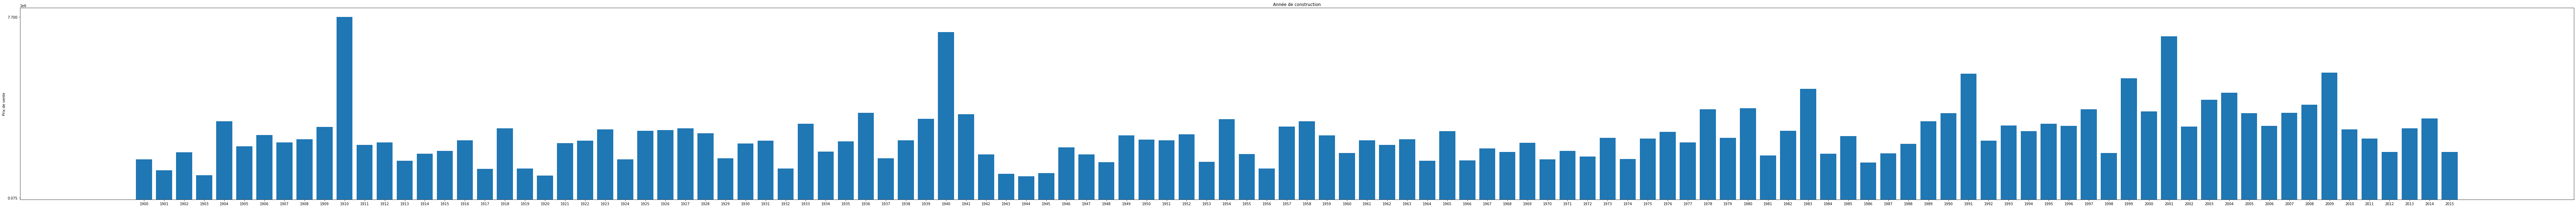

In [ ]:
plt.subplots(1, 1, sharex=True, figsize=(130,10))
plt.bar(data['Année de construction'],data["Prix de vente"])
plt.title('Année de construction')
plt.ylabel('Prix de vente')
plt.yticks(ticks=[data["Prix de vente"].describe().get("min"), data["Prix de vente"].describe().get("max")])
plt.xticks(ticks=data['Année de construction'].value_counts().index)
plt.show()

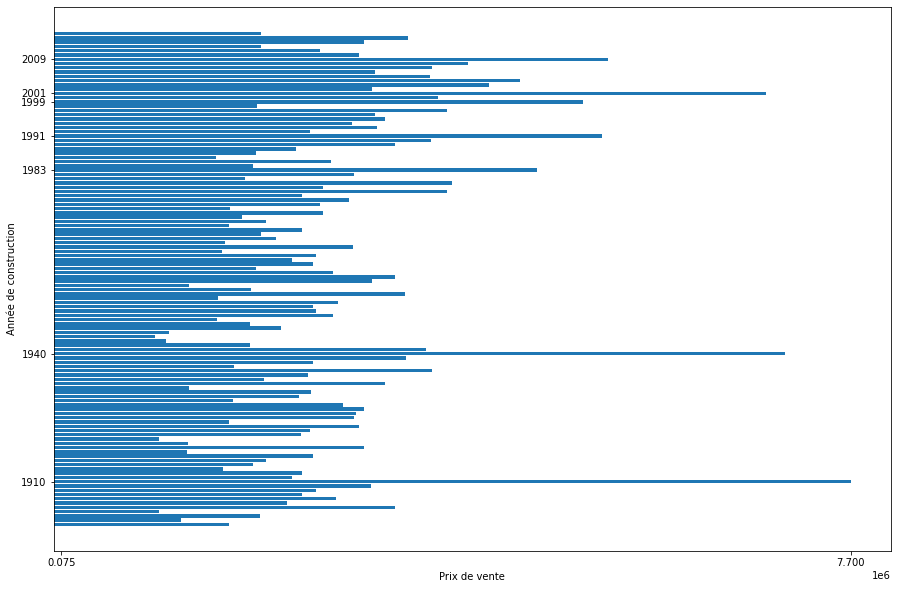

In [ ]:
plt.subplots(figsize=(15,10))
plt.barh(data['Année de construction'],data["Prix de vente"])
plt.ylabel('Année de construction')
plt.xlabel('Prix de vente')
plt.xticks(ticks=[data["Prix de vente"].describe().get("min"), data["Prix de vente"].describe().get("max")])
plt.yticks(ticks=[1910, 1940, 1983, 1991, 1999, 2001, 2009])
plt.show()

### Interpretation

les prix des maison les plus élévés sont celles dont l'annéé de construction est 

1910, 1940, 1983, 1991, 1999, 2001, 2009

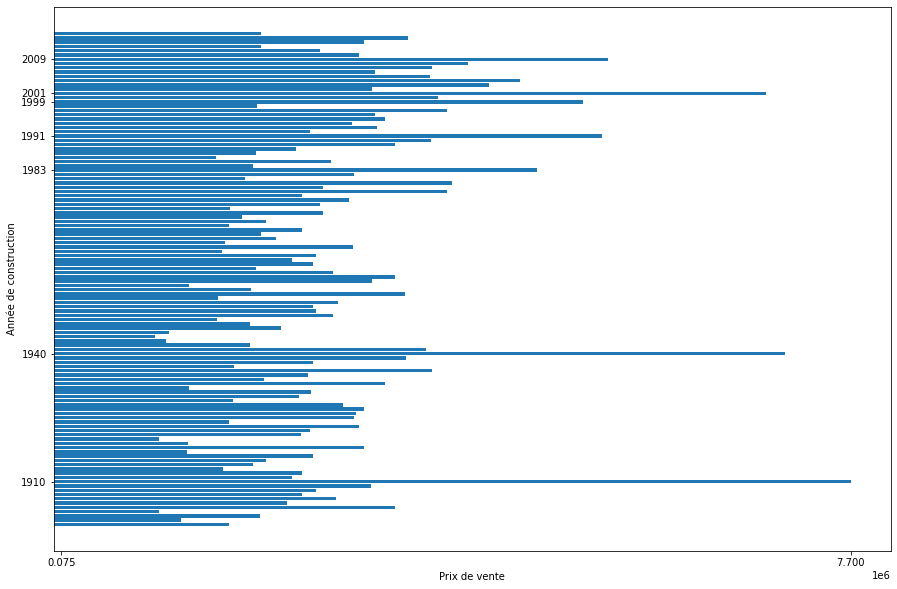

bar(x, y) x = Année de renovation et y = Prix de vente

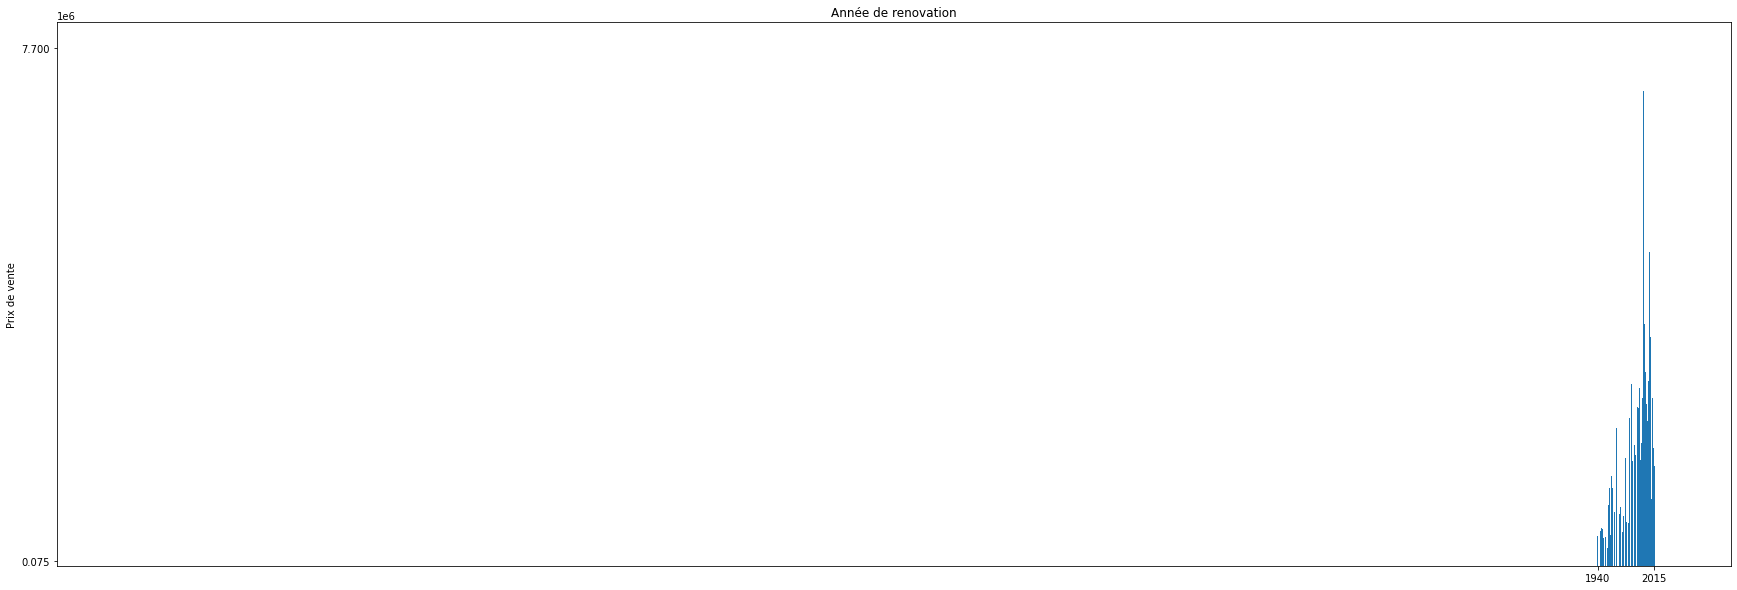

In [ ]:
plt.subplots(1, 1, sharex=True, figsize=(30,10))
plt.bar(data['Année de renovation'],data["Prix de vente"])
plt.title('Année de renovation')
plt.ylabel('Prix de vente')
plt.yticks(ticks=[data["Prix de vente"].describe().get("min"), data["Prix de vente"].describe().get("max")])
plt.xticks(ticks=[1940, 2015])
plt.show()

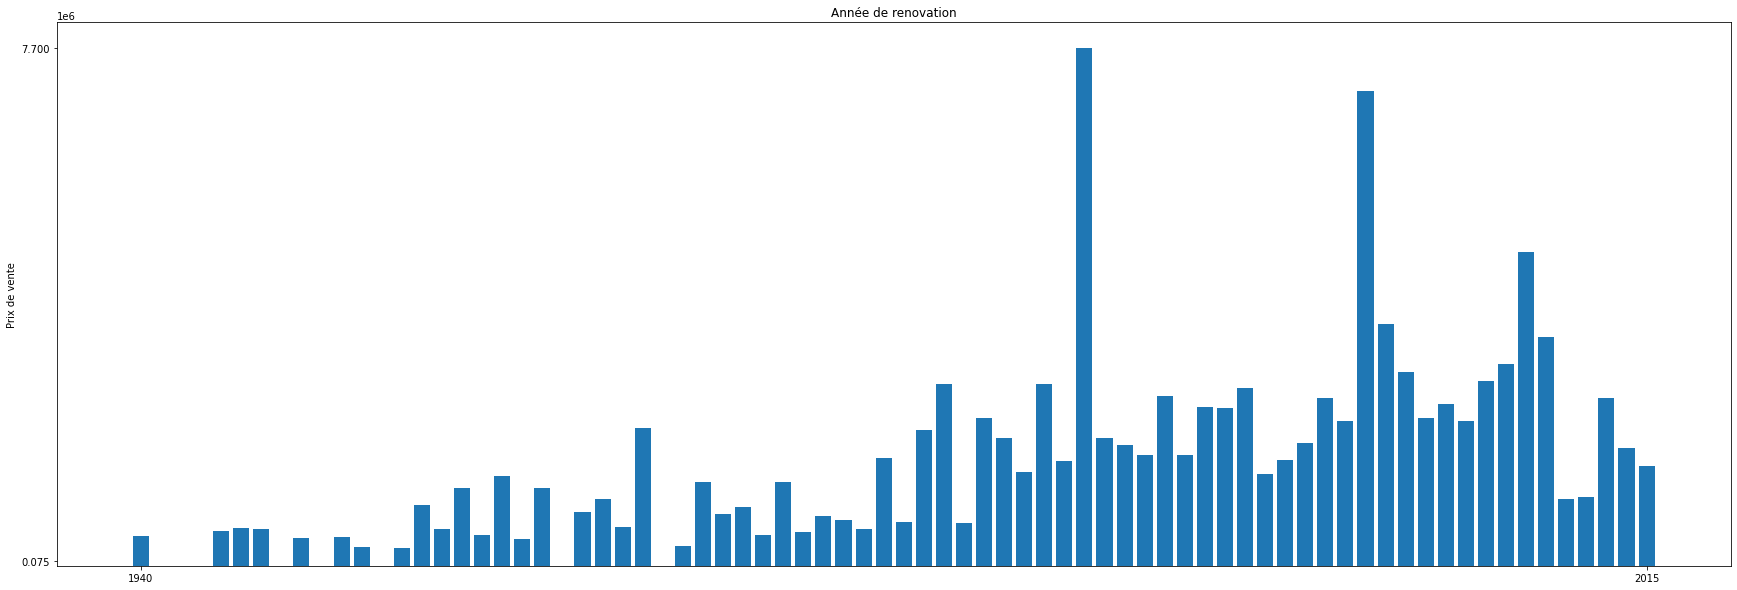

In [ ]:
plt.subplots(1, 1, sharex=True, figsize=(30,10))
plt.bar(data['Année de renovation'][data['Année de renovation'].values >= 1940] ,data["Prix de vente"][data['Année de renovation'].values >= 1940] )
plt.title('Année de renovation')
plt.ylabel('Prix de vente')
plt.yticks(ticks=[data["Prix de vente"].describe().get("min"), data["Prix de vente"].describe().get("max")])
plt.xticks(ticks=[1940, 2015])
plt.show()

## Interpretation 

Des maisons on subit de rénovations entre 1940 et 2015 et les plus chère d'entre elles sont celles dont les rénovations sont récentes 
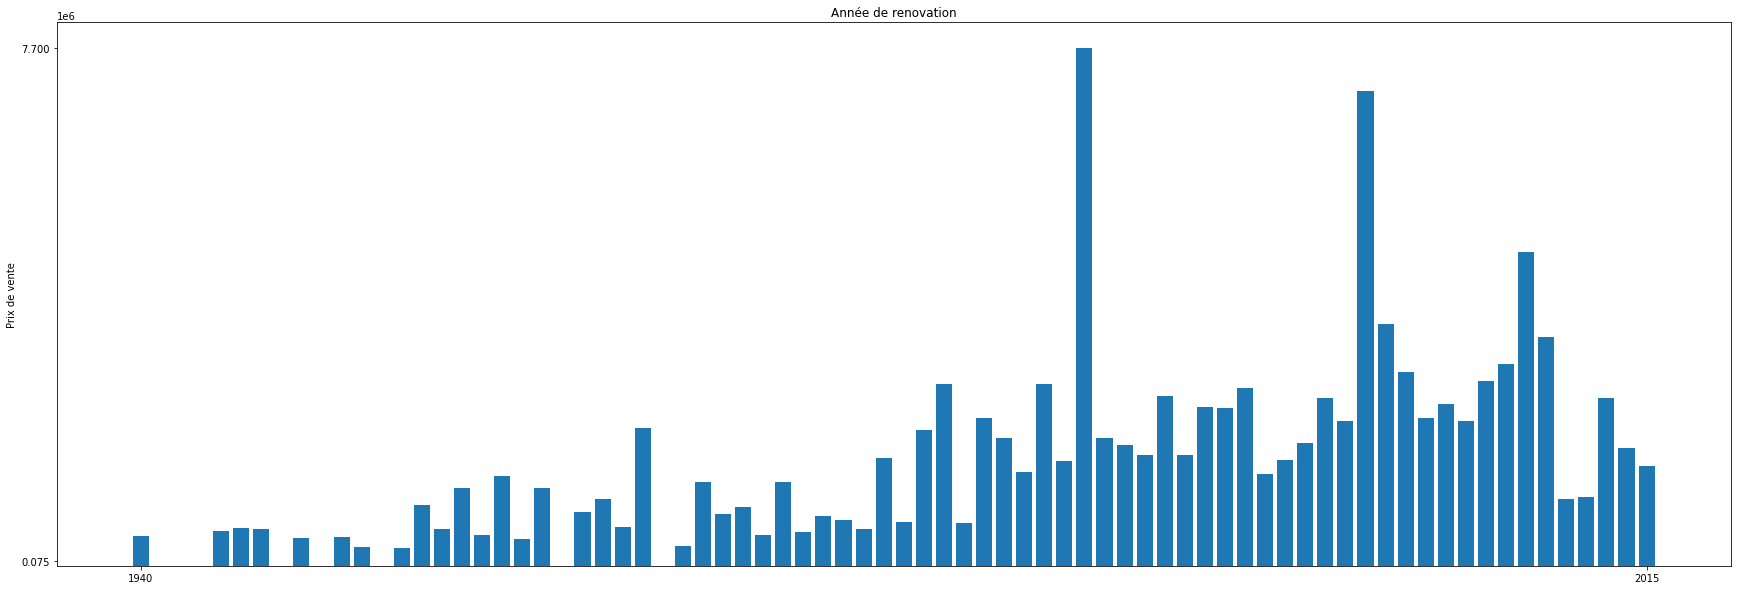

scatter(x,y) x= Nombre de chambres, Nombre de salles de bains, Nombre total d'étages et y = Prix de vente

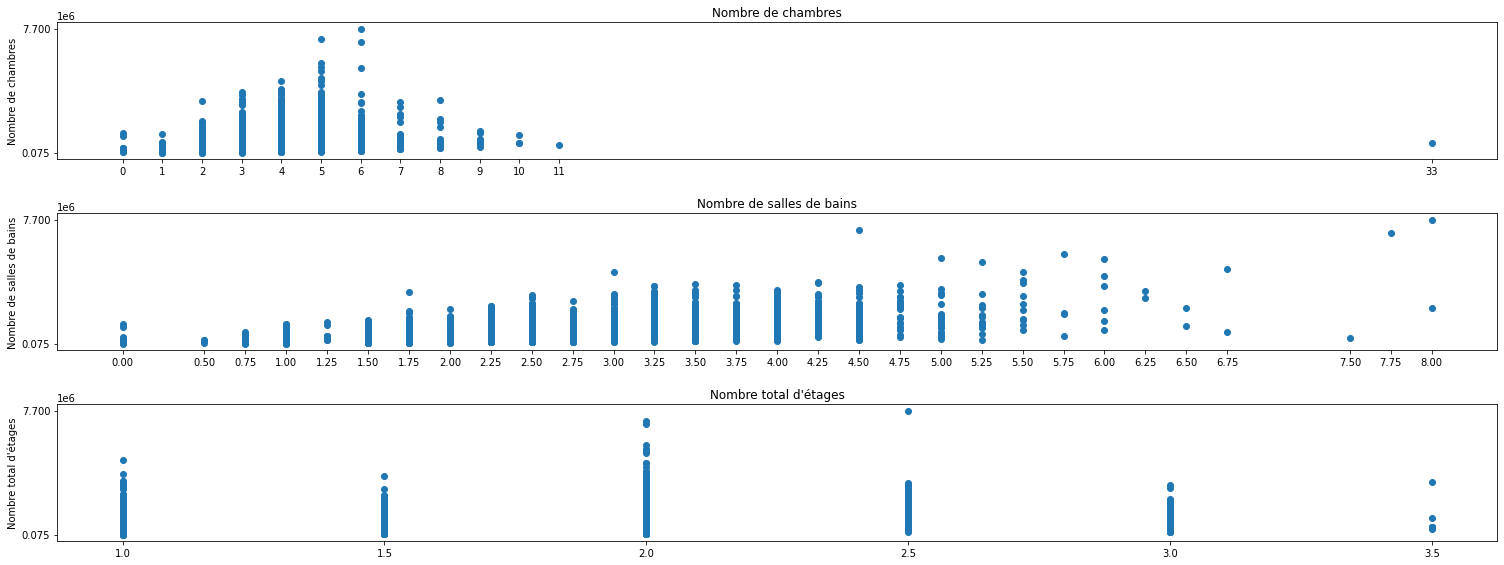

In [ ]:
# catégorie Nombre de ...
catNbr = ["Nombre de chambres", "Nombre de salles de bains", "Nombre total d'étages"] # scatter(x, y)
i = 0
plt.subplots(len(catNbr), 1, sharex=True, figsize=(25,9))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for cat in catNbr:  
  i += 1
  plt.subplot(len(catNbr), 1, i) 
  plt.scatter(data[cat],data["Prix de vente"])
  plt.title(cat)
  plt.ylabel(cat)
  plt.yticks(ticks=[data["Prix de vente"].describe().get("min"), data["Prix de vente"].describe().get("max")])
  plt.xticks(ticks=data[cat].value_counts().index)
plt.show()

## Interpretation 
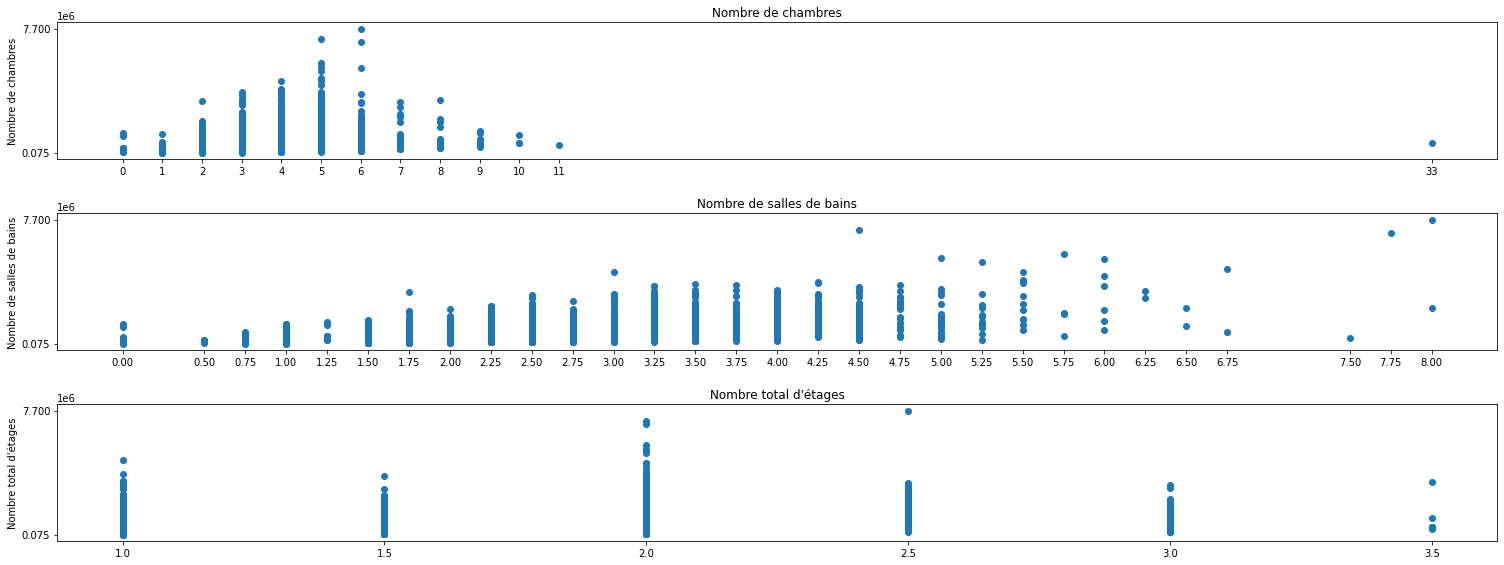

les maisons les plus chères ont entre 3 et 7 chambres et  compte entre 1 et 5 salles de bains et ont au moins 2 étages 

sns.boxplot(x,y) x= Note générale, Maison consulté, Etat de la maison et y = Prix de vente

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



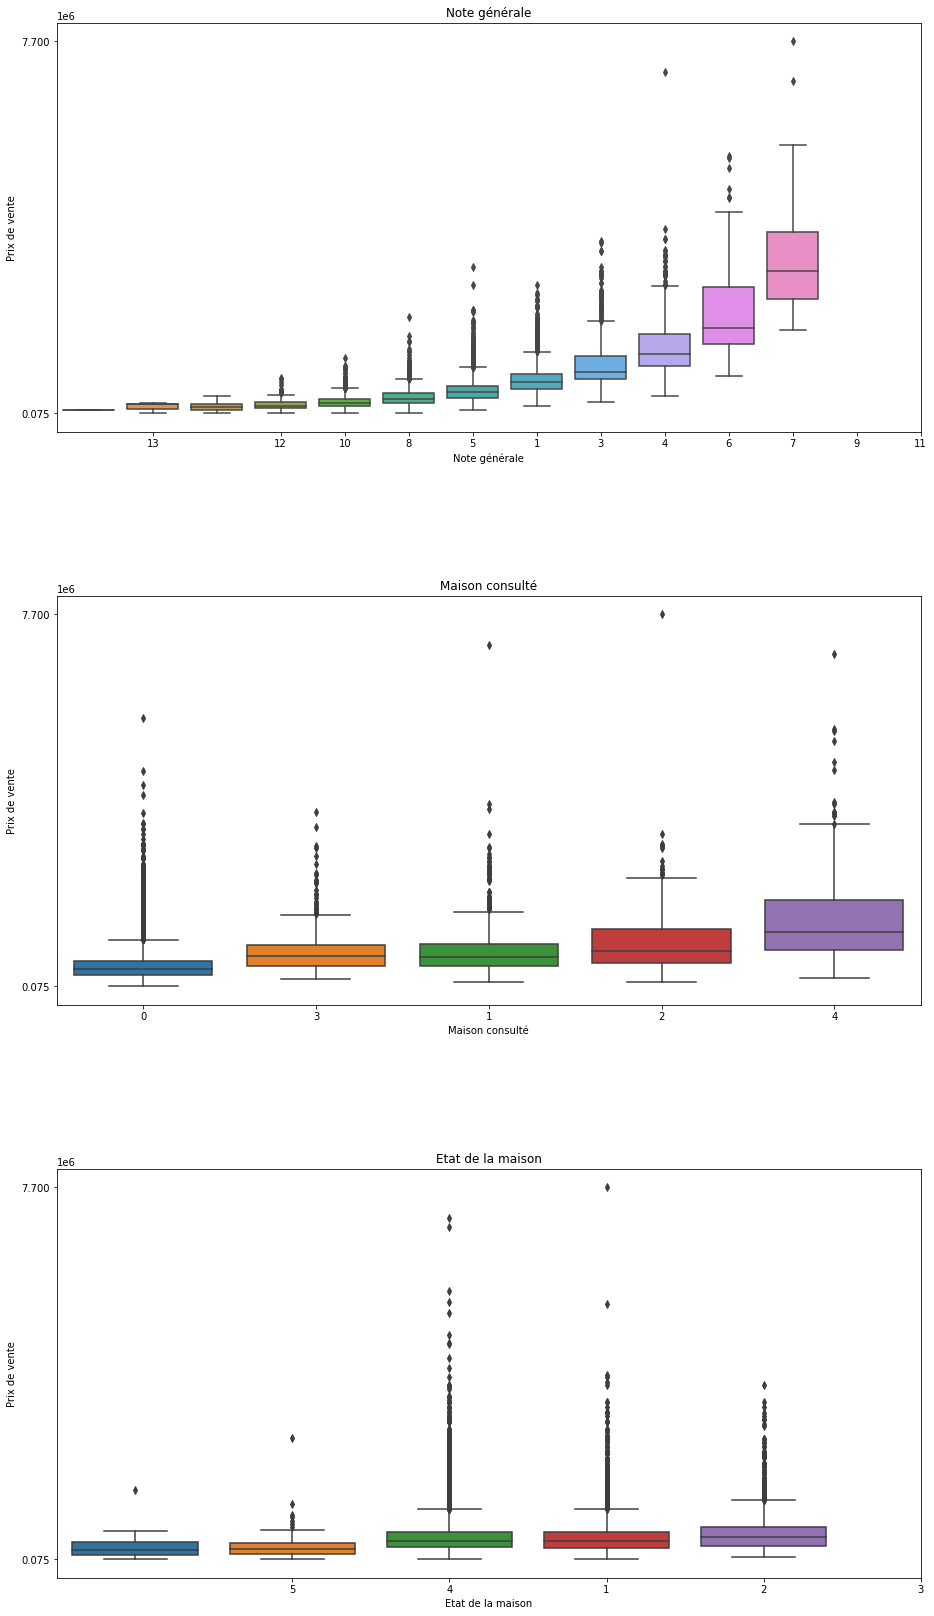

In [ ]:
catSondage = ['Note générale', 'Maison consulté', 'Etat de la maison',] # pie(x)
i = 0
plt.subplots(len(catSondage), 1, sharex=True, figsize=(15,27))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for cat in catSondage:  
  i += 1
  plt.subplot(len(catSondage), 1, i) 
  sns.boxplot(data[cat],data["Prix de vente"])
  plt.title(cat)
  plt.ylabel("Prix de vente")
  plt.yticks(ticks=[data["Prix de vente"].describe().get("min"), data["Prix de vente"].describe().get("max")])
  plt.xticks(ticks=data[cat].value_counts().index)
plt.show()

## Interpretation
Quelques outlier affectent le prix de vente  notament dans **Note général**, **Maisons Consulté**  et l'**état de la maison**:
* le prix est pratiquement casiment le même quelque soit l'état de la maison 
* les maison achaté au prix fort sont celles dont qui ont été consulté le maximum de fois (4) 
* les maison les plus chère concernent les maison aux plus grandes notes 


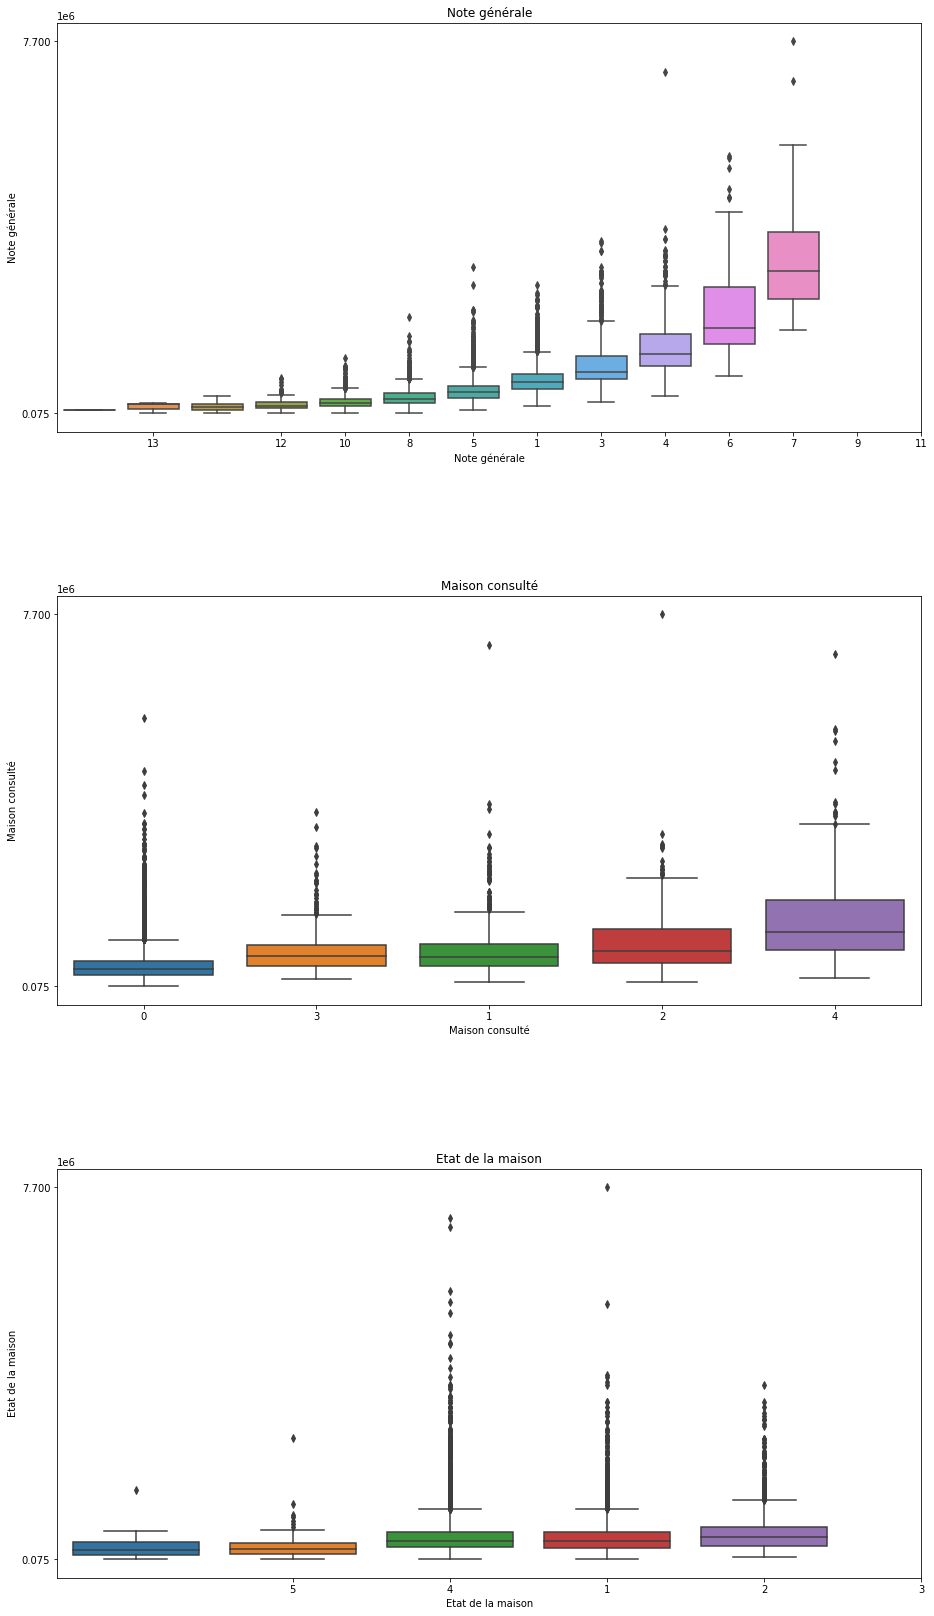

Les Maison selon leur localisation et le prix de vente 

In [ ]:
import plotly.express as px

fig = px.scatter_geo(data,lat='Latitude (°)',lon='Longitude (°)')
fig.update_layout(title = 'Localisation des Maisons sur le Map', title_x=0.5)
fig.show()

In [ ]:
import plotly.express as px
color_scale = [(0, 'white'), (1,'red')]

fig = px.scatter_mapbox(data, 
                        lat='Latitude (°)', 
                        lon='Longitude (°)', 
                        hover_name="Prix de vente", 
                        hover_data=["Prix de vente", "superficie de la maison en sq.ft", 'Avec vue sur mer', 'Note générale'],
                        color="superficie de la maison en sq.ft",
                        color_continuous_scale=color_scale,
                        size="superficie de la maison en sq.ft",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

Le lieux où le prix est le plus fort : 7700000.0

In [ ]:
from IPython.display import IFrame

In [ ]:
IFrame('https://www.google.com/maps/embed?pb=!1m17!1m12!1m3!1d298205.4705936821!2d-121.4723008265175!3d47.73672202462981!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m2!1m1!2zNDfCsDQ2JzM5LjQiTiAxMjHCsDE4JzU0LjAiVw!5e1!3m2!1sfr!2stn!4v1667127811034!5m2!1sfr!2stn', 600, 450)

## Interpretation

Les Maison se trouvent dans la zone amérique et dans la région de seattle au USA 

![](https://github.com/lmlouis/IntroductionIA/blob/main/mapKCHouse.gif)



# Feature Selection

2. Write a paragraph selecting the most important features (feature selection).

Correlation avec le Prix de vente de la maison

In [ ]:
correlationPrix = data.corr()['Prix de vente'].sort_values()
correlationPrix

Code postal US                         -0.053203
Longitude (°)                           0.021626
Etat de la maison                       0.036362
Année de construction                   0.054012
superficie du terrain en 2015           0.082447
superficie du terrain en ft             0.089661
Année de renovation                     0.126434
Nombre total d'étages                   0.256794
Avec vue sur mer                        0.266369
Latitude (°)                            0.307003
Nombre de chambres                      0.308350
Superficie du sous-sol en sq.ft         0.323816
Maison consulté                         0.397293
Nombre de salles de bains               0.525138
Surface du salon en 2015                0.585379
Superficie sans le sous-sol en sq.ft    0.605567
Note générale                           0.667434
superficie de la maison en sq.ft        0.702035
Prix de vente                           1.000000
Name: Prix de vente, dtype: float64

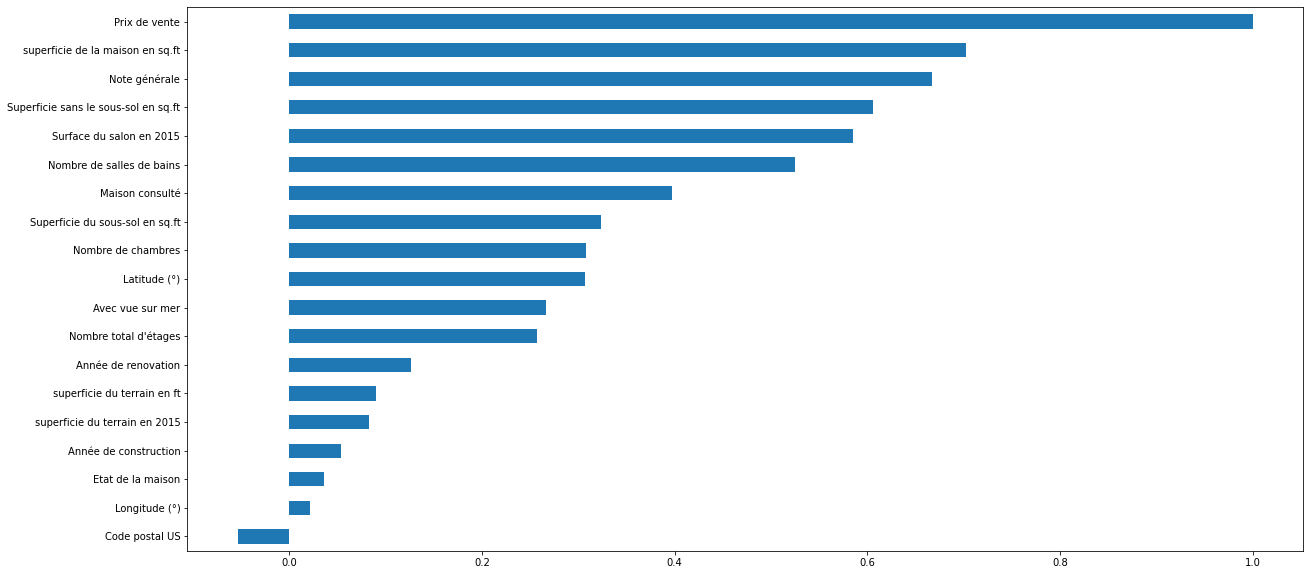

In [ ]:
plt.figure(figsize=(20,10))
correlationPrix.plot(kind='barh')

## Interpretation :
Les caractéristiques les plus importantes sont celles qui ont au moins **50% de  correlation** avec le **prix** c'est à dire les colones :

**Nombre de salles de bains**               0.525138

**Surface du salon en 2015**                0.585379

**Superficie sans le sous-sol en sq.ft**    0.605567

**Note générale**                           0.667434

**superficie de la maison en sq.ft**        0.702035

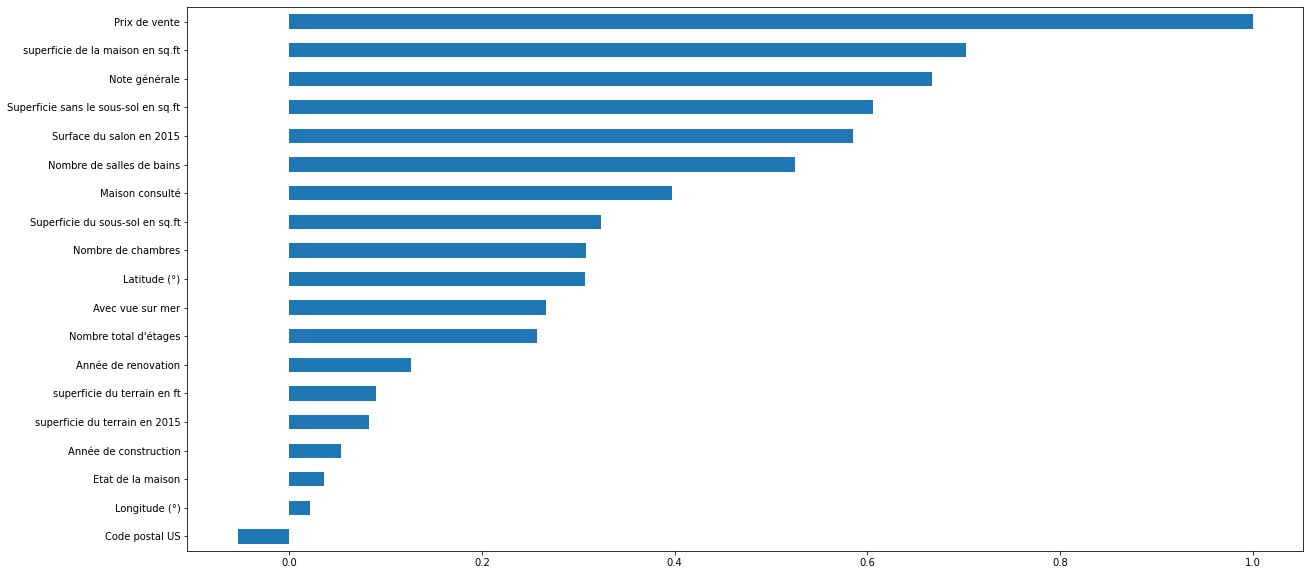

## Split Data
3. Split your dataset into a training set and a testing set.

In [ ]:
features = ['Nombre de salles de bains','Surface du salon en 2015', 'Superficie sans le sous-sol en sq.ft', 'Note générale', 'superficie de la maison en sq.ft']
target = 'Prix de vente'
dataset = pd.DataFrame()
dataset[target] =  data[target]
dataset[features] = data[features]
dataset.head()

,Prix de vente,Nombre de salles de bains,Surface du salon en 2015,Superficie sans le sous-sol en sq.ft,Note générale,superficie de la maison en sq.ft
0,221900.0,1.00,1340,1180,7,1180
1,538000.0,2.25,1690,2170,7,2570
2,180000.0,1.00,2720,770,6,770
3,604000.0,3.00,1360,1050,7,1960
4,510000.0,2.00,1800,1680,8,1680


# Importer les Librairies 
 * train_test_split 
 * LinearRegression
 * mean_squared_error
 * r2_score


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = dataset[features]
x

,Nombre de salles de bains,Surface du salon en 2015,Superficie sans le sous-sol en sq.ft,Note générale,superficie de la maison en sq.ft
0,1.00,1340,1180,7,1180
1,2.25,1690,2170,7,2570
2,1.00,2720,770,6,770
3,3.00,1360,1050,7,1960
4,2.00,1800,1680,8,1680
...,...,...,...,...,...
21608,2.50,1530,1530,8,1530
21609,2.50,1830,2310,8,2310
21610,0.75,1020,1020,7,1020
21611,2.50,1410,1600,8,1600


In [ ]:
y = dataset[target]
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Prix de vente, Length: 21613, dtype: float64

split les données en x_train, x_test, y_train, y_test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) #splitting data with test size of 20%
print(f"x_train.shape = {x_train.shape}")
print(f"x_test.shape = {x_test.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_test.shape = {y_test.shape}")

x_train.shape = (17290, 5)
x_test.shape = (4323, 5)
y_train.shape = (17290,)
y_test.shape = (4323,)


In [ ]:
y_train

7495      515000.0
8804     1000000.0
21471     525000.0
9890      128000.0
16340     100000.0
           ...    
11532     610000.0
16065     280000.0
14501     171500.0
14555     930000.0
11590     255000.0
Name: Prix de vente, Length: 17290, dtype: float64

## Linear Regression

4. Apply linear regression to your training set

In [ ]:
from sklearn.linear_model import LinearRegression

On va juste utiliser 1 colones

> Superficie sans le sous-sol en sq.ft



In [ ]:
xtrain = pd.DataFrame(x_train["Superficie sans le sous-sol en sq.ft"])
xtest =  pd.DataFrame(x_test["Superficie sans le sous-sol en sq.ft"])

In [ ]:
model=LinearRegression()   #construir le model de  linear regression 

#faire l'entrenaiement du model
model.fit(X = xtrain, y = y_train)
predicted=model.predict(xtest) #testing our model’s performance

# les coefficients
print("Coefficients \n")
print("a: \n", model.coef_)
print("b: \n", model.intercept_)
print(" -------------- \n")

 



Coefficients 

a: 
 [270.38104848]
b: 
 56972.25757804321
 -------------- 



5. Plot the linear regression.

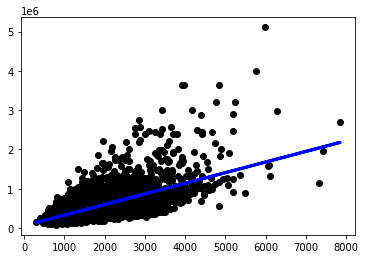

In [ ]:
plt.scatter(xtest, y_test, color="black")
plt.plot(xtest, predicted, color="blue", linewidth=3)

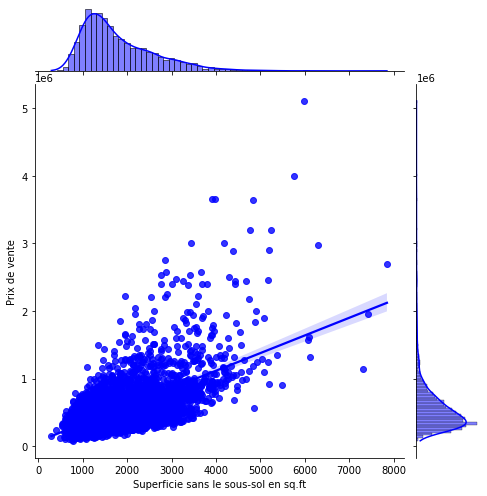

In [ ]:
y_pred = predicted
sns.jointplot(x="Superficie sans le sous-sol en sq.ft", y=y_test, data=xtest, kind="reg" ,
                 color="b", height=7)
plt.show()

6. Measure the performance of linear regression using the testing set.

On va utiliser le Mean Square Error et Le R squared

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# les metrics 
print("Metrics \n")
print("MSE: %.2f" % mean_squared_error(y_test,predicted))
print("R squared (R²): %.2f" % r2_score(y_test,predicted))
print(" -------------- \n")

Metrics 

MSE: 78645081812.32
R squared (R²): 0.37
 -------------- 



faison la même procédure pour toute les colones de ma liste de features

 ---------------------------------------------- ------------------------Linear Régression :  Nombre de salles de bains
Coefficients 

a: 
 [252409.2400858]
b: 
 6155.223960880772
 -------------- 



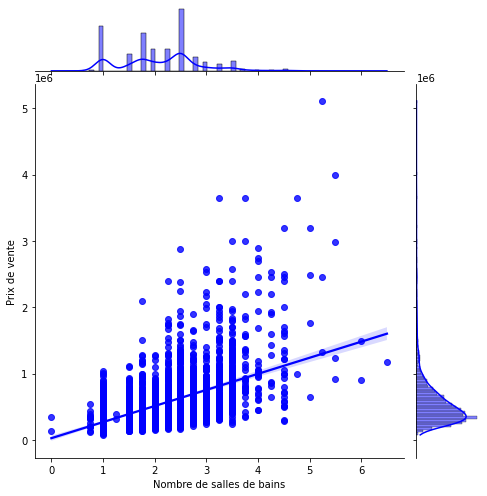

Metrics 

MSE: 90473463096.07
R squared (R²): 0.28
 -------------- 

 ---------------------------------------------- ------------------------Linear Régression :  Surface du salon en 2015
Coefficients 

a: 
 [314.86207926]
b: 
 -85669.82669077558
 -------------- 



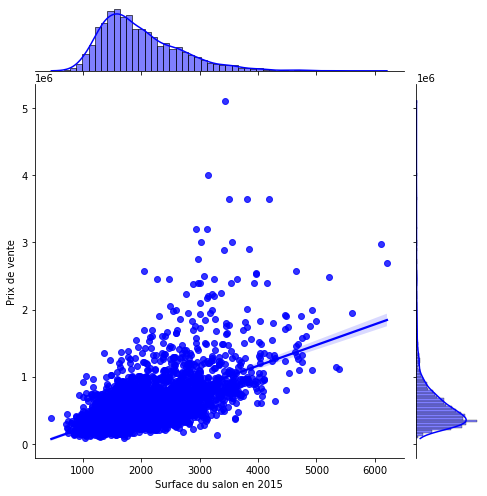

Metrics 

MSE: 80933367515.28
R squared (R²): 0.36
 -------------- 

 ---------------------------------------------- ------------------------Linear Régression :  Superficie sans le sous-sol en sq.ft
Coefficients 

a: 
 [270.38104848]
b: 
 56972.25757804321
 -------------- 



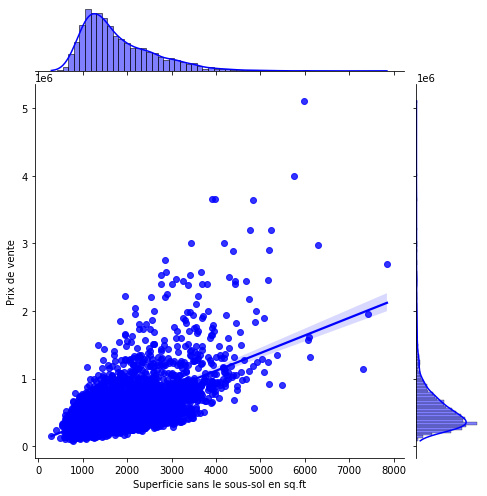

Metrics 

MSE: 78645081812.32
R squared (R²): 0.37
 -------------- 

 ---------------------------------------------- ------------------------Linear Régression :  Note générale
Coefficients 

a: 
 [210098.76656454]
b: 
 -1068763.269736698
 -------------- 



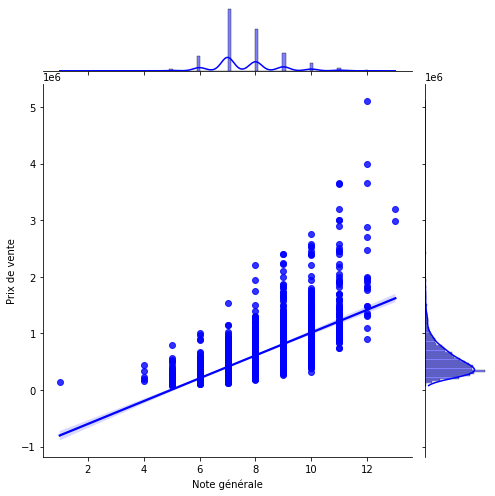

Metrics 

MSE: 68533946794.31
R squared (R²): 0.46
 -------------- 

 ---------------------------------------------- ------------------------Linear Régression :  superficie de la maison en sq.ft
Coefficients 

a: 
 [282.4452088]
b: 
 -47399.24599582201
 -------------- 



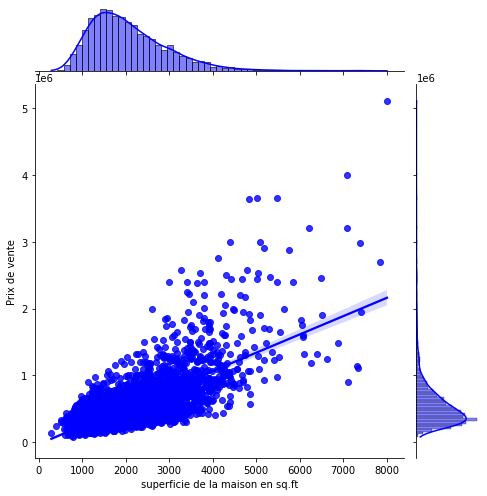

Metrics 

MSE: 62451720102.95
R squared (R²): 0.50
 -------------- 



In [ ]:
for cat in features:
  print(f" ---------------------------------------------- ------------------------Linear Régression :  {cat}")
  xtrain = pd.DataFrame(x_train[cat])
  xtest =  pd.DataFrame(x_test[cat])
  model=LinearRegression()   #construir le model de  linear regression 

  #model.fit(xtrain,y_train)  #faire l'entrenaiement du model
  model.fit(X = xtrain, y = y_train)
  predicted=model.predict(xtest) #testing our model’s performance

  # les coefficients
  print("Coefficients \n")
  print("a: \n", model.coef_)
  print("b: \n", model.intercept_)
  print(" -------------- \n")

  # graph
  y_pred = predicted
  sns.jointplot(x=cat, y=y_test, data=xtest, kind="reg" ,
                 color="b", height=7)
  plt.show()
  # les metrics 
  print("Metrics \n")
  print("MSE: %.2f" % mean_squared_error(y_test,predicted))
  print("R squared (R²): %.2f" % r2_score(y_test,predicted))
  print(" -------------- \n")


# Interpretation
**Linear Régression :**  superficie de la maison en sq.ft

Coefficients 

a: 
 [282.4452088]
b: 
 -47399.24599582201

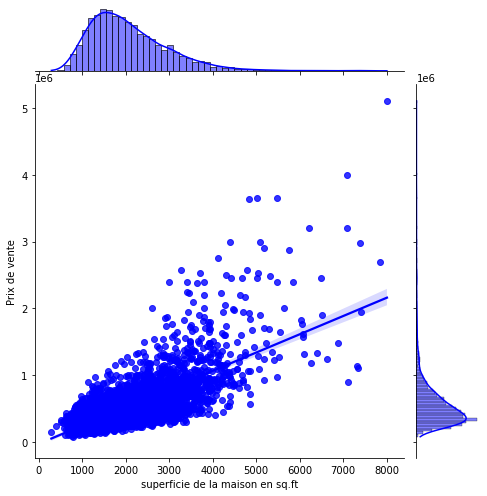


Metrics 

MSE: 62451720102.95 

R squared (R²): 0.50

est le meilleurs model pour l'instant 

## Multiple Linear Regression

6. Apply multiple-linear regression and compare it to the linear model.

In [ ]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
# les coefficients
print("Coefficients \n")
print("a: \n", model.coef_)
print("b: \n", model.intercept_)
print(" -------------- \n")
# les metrics 
print("Metrics \n")
print("MSE: %.2f" % mean_squared_error(y_test,predicted))
print("R squared (R²): %.2f" % r2_score(y_test,predicted))
print(" -------------- \n")
# les metrics 

print(" -------------- \n")

Coefficients 

a: 
 [-3.42798125e+04  2.40136067e+01 -8.07840861e+01  1.11603623e+05
  2.45740769e+02]
b: 
 -656523.1689960032
 -------------- 

Metrics 

MSE: 55960730384.97
R squared (R²): 0.56
 -------------- 

 -------------- 



Graph 



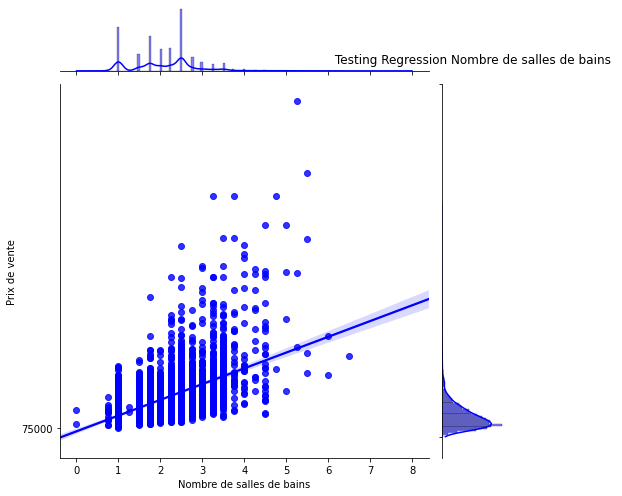

 -------------- 



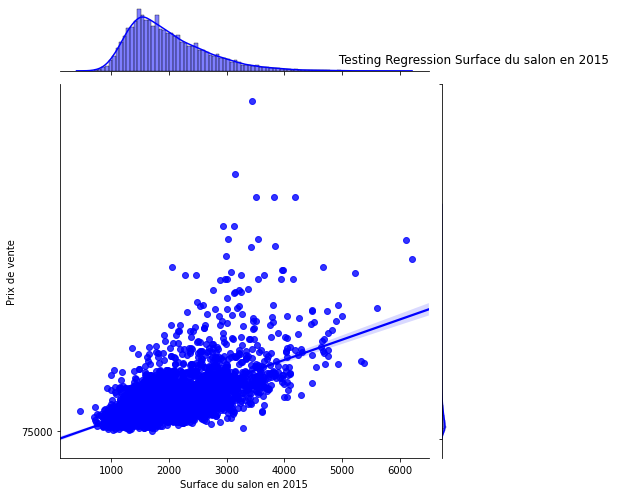

 -------------- 



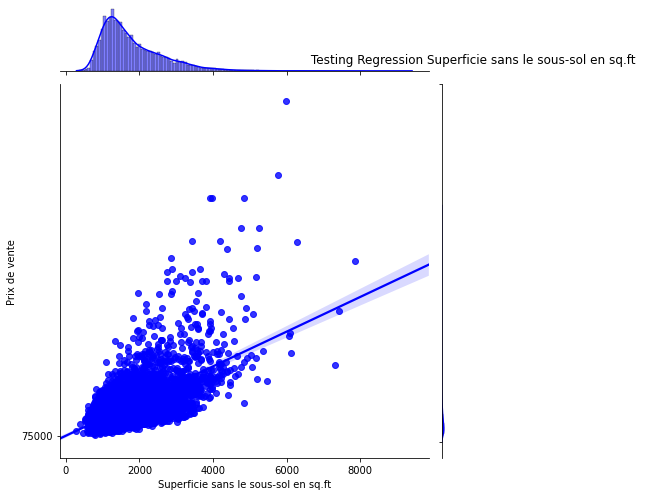

 -------------- 



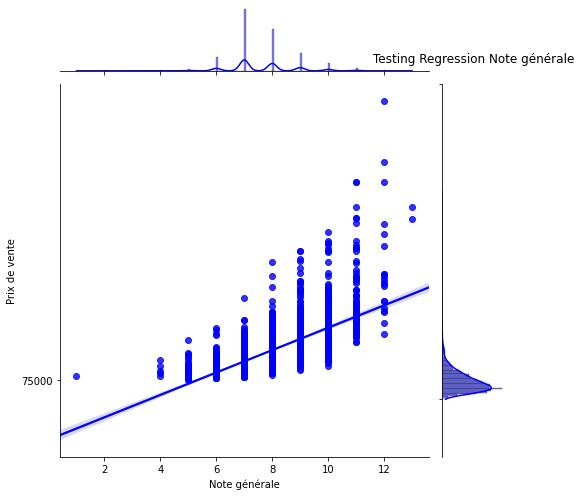

 -------------- 



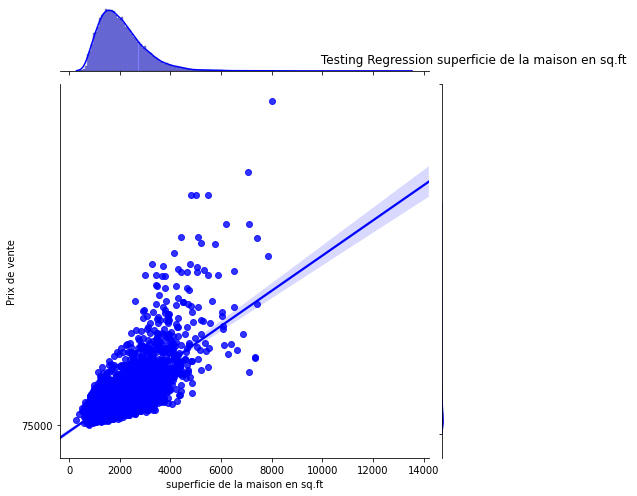

 -------------- 



In [ ]:
print("Graph \n")
for feat in features:
  y_pred = predicted
  sns.jointplot(x=feat, y=y_test,data=data, kind="reg" , truncate=False,
                 #xlim=(0, 60), ylim=(0, 12),
                 color="b", height=7)
  plt.title(f"\n Testing Regression {feat} \n")
  plt.yticks(ticks=[data["Prix de vente"].describe().get("min"), data["Prix de vente"].describe().get("max")])
  plt.xticks(ticks=[data[feat].describe().get("min"), data[feat].describe().get("max")])
  plt.show()

  print(" -------------- \n")


In [ ]:
comparaison = pd.DataFrame()
comparaison.index = ['MSE', 'R squared']
comparaison['Regression Linéaire'] = [62451720102.95, 0.50]
comparaison['Regression Linéaire Multiple'] = [55960730384.97, 0.56]
comparaison

,Regression Linéaire,Regression Linéaire Multiple
MSE,6.245172e+10,5.596073e+10
R squared,5.000000e-01,5.600000e-01


# Interpretation

**Multi-linear Regression**

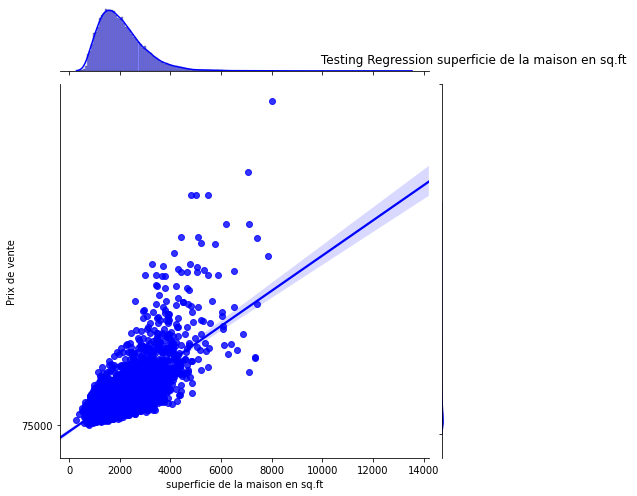

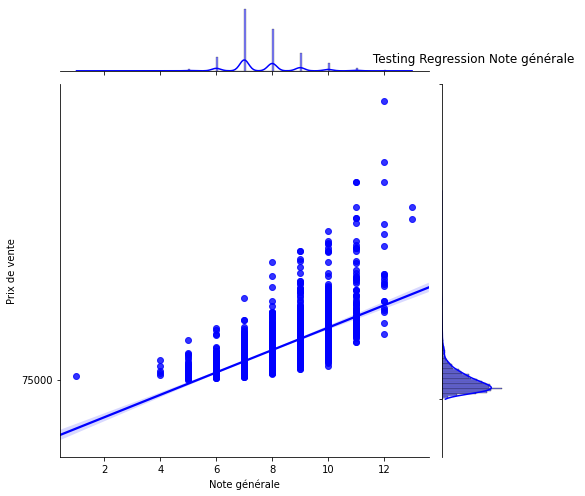
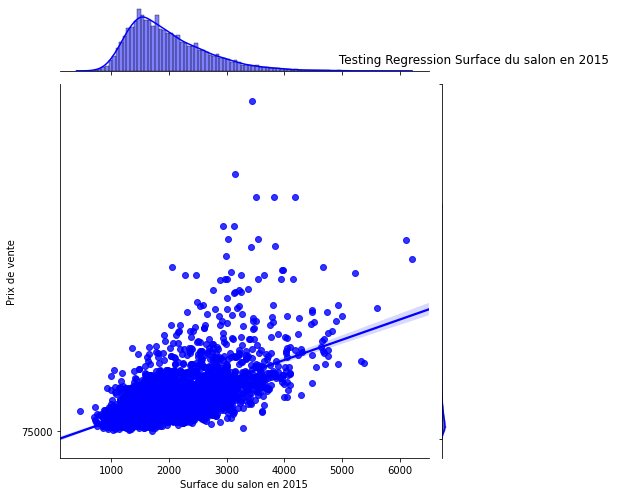
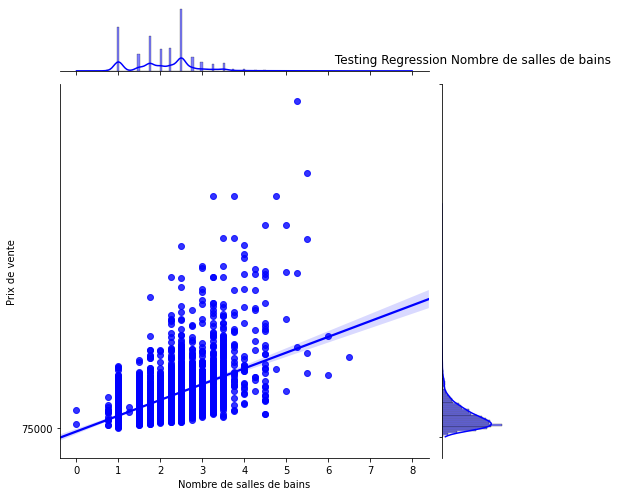

Coefficients 

a: 
 [-3.42798125e+04  2.40136067e+01 -8.07840861e+01  1.11603623e+05
  2.45740769e+02]

b: 
 -656523.1689960032


Metrics 

MSE: 55960730384.97

R squared (R²): 0.56


**Conclusion** :

La régression multi-linéaire  est **plus précise** que la régression linéaire
R²(Multi-linéaire): 0.56  >= max R²(Linéaire) 50
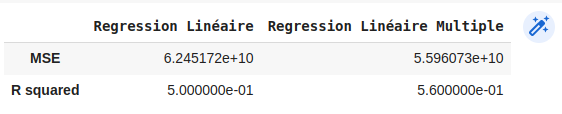

## Polynomial Regression

8. Apply polynomial regression and compare it to linear and multilinear regression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

In [ ]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=x.shape[1])
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", mean_squared_error(y_test, predicted))
print("R squared: ", r2_score(y_test,predicted))

MSE:  57031480484.46385
R squared:  0.5466405961960802


In [ ]:
comparaison = pd.DataFrame()
comparaison.index = ['MSE', 'R squared']
comparaison['Regression Linéaire'] = [62451720102.95, 0.50]
comparaison['Regression Linéaire Multiple'] = [55960730384.97, 0.56]
comparaison['Polynomial regression'] = [57031480484.46385, 0.5466405961960802]
comparaison

,Regression Linéaire,Regression Linéaire Multiple,Polynomial regression
MSE,6.245172e+10,5.596073e+10,5.703148e+10
R squared,5.000000e-01,5.600000e-01,5.466406e-01


## Conclusion

Polynomial meilleur MSE 5.703148e+10 mais Mult-Linear regression a le meilleur R squared 5,6x10^-1

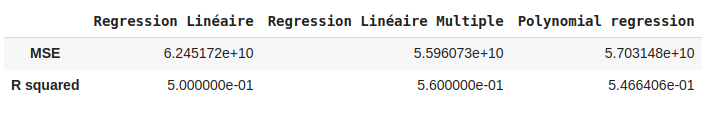